In [351]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_classification
import time
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

## Data Preprocessing

In [352]:
# Load the dataset
df = pd.read_excel("/content/sample_data/ai4i2020.xlsx")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,1,M14860,M,298.100,308.600,1551,42.800,0,0,0,0,0,0,0,No Failure
1,2,L47181,L,298.200,308.700,1408,46.300,3,0,0,0,0,0,0,No Failure
2,3,L47182,L,298.100,308.500,1498,49.400,5,0,0,0,0,0,0,No Failure
3,4,L47183,L,298.200,308.600,1433,39.500,7,0,0,0,0,0,0,No Failure
4,5,L47184,L,298.200,308.700,1408,40.000,9,0,0,0,0,0,0,No Failure


In [353]:
# Check the shape of the dataset
print("\nShape of Dataset (rows, columns):")
print(df.shape)


Shape of Dataset (rows, columns):
(10000, 15)


In [355]:
# Check column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type']


In [356]:
# Rename columns
df.rename(columns = {
    'UDI' : 'UID',
    'Product ID' : 'Product_ID',
    'Air temperature [K]' : 'Air temperature',
    'Process temperature [K]' : 'Process temperature',
    'Rotational speed [rpm]' : 'Rotational speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool wear'
}, inplace = True)
df.head()

,UID,Product_ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,1,M14860,M,298.100,308.600,1551,42.800,0,0,0,0,0,0,0,No Failure
1,2,L47181,L,298.200,308.700,1408,46.300,3,0,0,0,0,0,0,No Failure
2,3,L47182,L,298.100,308.500,1498,49.400,5,0,0,0,0,0,0,No Failure
3,4,L47183,L,298.200,308.600,1433,39.500,7,0,0,0,0,0,0,No Failure
4,5,L47184,L,298.200,308.700,1408,40.000,9,0,0,0,0,0,0,No Failure


In [357]:
# Check datatypes of each column
df.dtypes

,0
UID,int64
Product_ID,object
Type,object
Air temperature,float64
Process temperature,float64
Rotational speed,int64
Torque,float64
Tool wear,int64
Machine failure,int64
TWF,int64


In [358]:
# Check summary statistics
print("\nStatistical Summary:")
print(df.describe(include = 'all'))


Statistical Summary:
             UID Product_ID   Type  Air temperature  Process temperature  \
count  10000.000      10000  10000        10000.000            10000.000   
unique       NaN      10000      3              NaN                  NaN   
top          NaN     L57163      L              NaN                  NaN   
freq         NaN          1   6000              NaN                  NaN   
mean    5000.500        NaN    NaN          300.005              310.006   
std     2886.896        NaN    NaN            2.000                1.484   
min        1.000        NaN    NaN          295.300              305.700   
25%     2500.750        NaN    NaN          298.300              308.800   
50%     5000.500        NaN    NaN          300.100              310.100   
75%     7500.250        NaN    NaN          301.500              311.100   
max    10000.000        NaN    NaN          304.500              313.800   

        Rotational speed    Torque  Tool wear  Machine failure   

In [359]:
# Check for null values
print("\nNull Values per Column:")
print(df.isnull().sum())


Null Values per Column:
UID                    0
Product_ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
Failure Type           0
dtype: int64


In [360]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
0


In [361]:
# Check for unique values in "Product ID" column
if "Product_ID" in df.columns:
    print("\nNumber of Unique Product IDs:", df['Product_ID'].nunique())
    print("Unique Product IDs Sample:", df['Product_ID'].unique()[:5])


Number of Unique Product IDs: 10000
Unique Product IDs Sample: ['M14860' 'L47181' 'L47182' 'L47183' 'L47184']


In [362]:
# Extract Product IDs and save as df1
df1 = df.copy()
df1['Product_ID_clean'] = [''.join(filter(str.isdigit, pid)) for pid in df1['Product_ID']]
print(df1['Product_ID_clean'])

0       14860
1       47181
2       47182
3       47183
4       47184
        ...  
9995    24855
9996    39410
9997    24857
9998    39412
9999    24859
Name: Product_ID_clean, Length: 10000, dtype: object


In [363]:
# Convert numeric columns to float
df1['Rotational speed'] = df1['Rotational speed'].astype('float64')
df1['Tool wear'] = df1['Tool wear'].astype('float64')

In [364]:
# Filter rows where Failure Type is "Random Failures" AND Machine failure = 0
filtered_df = df1[(df1['Failure Type'] == 'Random Failures') & (df1['Machine failure'] == 0)]

# Display the result (only the specified columns)
result = filtered_df[['Machine failure', 'Failure Type']]
print(f"Found {len(result)} entries")
print(result)

Found 18 entries
      Machine failure     Failure Type
1221                0  Random Failures
1302                0  Random Failures
1748                0  Random Failures
2072                0  Random Failures
2559                0  Random Failures
3065                0  Random Failures
3452                0  Random Failures
5471                0  Random Failures
5489                0  Random Failures
5495                0  Random Failures
5509                0  Random Failures
5553                0  Random Failures
5639                0  Random Failures
6091                0  Random Failures
6913                0  Random Failures
6960                0  Random Failures
7488                0  Random Failures
7868                0  Random Failures


In [365]:
# Get indices of rows to remove from df1
indices_to_drop = df1[(df1['Failure Type'] == 'Random Failures') & (df1['Machine failure'] == 0)].index

# Drop these rows from df1
df1.drop(indices_to_drop, inplace=True)

# Verify removal
print(f"Removed {len(indices_to_drop)} entries")
print(df1['Failure Type'].value_counts())

# Rename and save dataframe
df2 = df1.copy()

Removed 18 entries
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64


In [366]:
print("DataFrame shape after removal:", df2.shape)

DataFrame shape after removal: (9982, 16)


In [368]:
# Filter rows where Failure Type is "No Failure" AND Machine failure = 1
inconsistent_data = df2[(df2['Failure Type'] == 'No Failure') & (df2['Machine failure'] == 1)]

# Display the result
result = inconsistent_data[['Machine failure', 'Failure Type']]
print(f"Found {len(result)} inconsistent entries:")
print(result)

Found 9 inconsistent entries:
      Machine failure Failure Type
1437                1   No Failure
2749                1   No Failure
4044                1   No Failure
4684                1   No Failure
5536                1   No Failure
5941                1   No Failure
6478                1   No Failure
8506                1   No Failure
9015                1   No Failure


In [369]:
# Remove inconsistent rows from df2
indices_to_drop_2 = df2[(df2['Failure Type'] == 'No Failure') & (df2['Machine failure'] == 1)].index
df2.drop(indices_to_drop_2, inplace=True)
print(f"Removed {len(indices_to_drop_2)} inconsistent entries from df2")
print("Final df2 shape:", df2.shape)

# Save as df3
df3 = df2.copy()

Removed 9 inconsistent entries from df2
Final df2 shape: (9973, 16)


In [370]:
# examine the data structure
print("Dataset info:")
print(f"Shape: {df3.shape}")
print(f"Columns: {df3.columns.tolist()}")
print(f"Data types:\n{df3.dtypes}")

# Check for any columns with string values
print("\nChecking for string columns:")
for col in df3.columns:
    if df3[col].dtype == 'object':
        print(f"{col}: {df3[col].unique()[:10]}")

Dataset info:
Shape: (9973, 16)
Columns: ['UID', 'Product_ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type', 'Product_ID_clean']
Data types:
UID                      int64
Product_ID              object
Type                    object
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
Failure Type            object
Product_ID_clean        object
dtype: object

Checking for string columns:
Product_ID: ['M14860' 'L47181' 'L47182' 'L47183' 'L47184' 'M14865' 'L47186' 'L47187'
 'M14868' 'M14869']
Type: ['M' 'L' 'H']
Failure Type: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain F

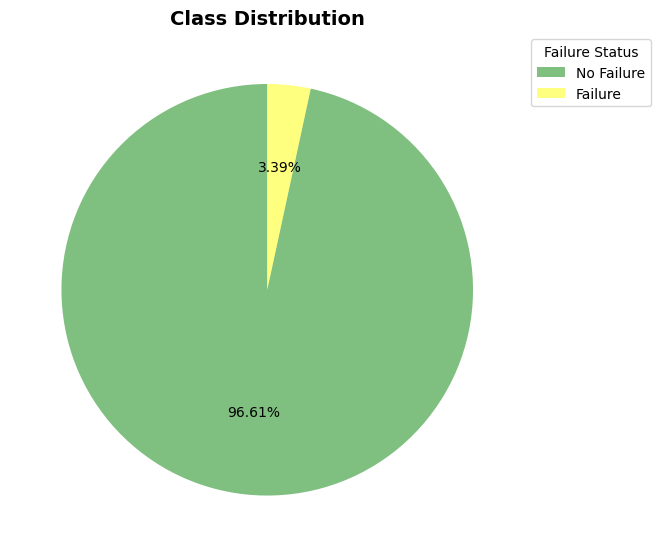

In [371]:
#  Class Distribution Plot
def plot_class_distribution(df, fig, gs):
    """Plot class distribution pie chart"""
    ax1 = fig.add_subplot(gs[0, 0])
    failure_counts = df['Machine failure'].value_counts()
    colors = ['green', 'yellow']
    labels = ['No Failure', 'Failure']

    wedges, texts, autotexts = ax1.pie(failure_counts.values,
                                       labels=None,
                                       autopct='%.2f%%',
                                       colors=colors,
                                       startangle=90,
                                       wedgeprops={'alpha': 0.5})

    # Add legend
    ax1.legend(wedges, labels,
              title="Failure Status",
              loc="upper left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)
plot_class_distribution(df, fig, gs)
plt.tight_layout()
plt.show()


3. CORRELATION ANALYSIS
------------------------------

Feature correlations with Machine failure (sorted):
Torque                 0.191
Tool wear              0.105
Air temperature        0.083
Process temperature    0.036
Rotational speed      -0.044


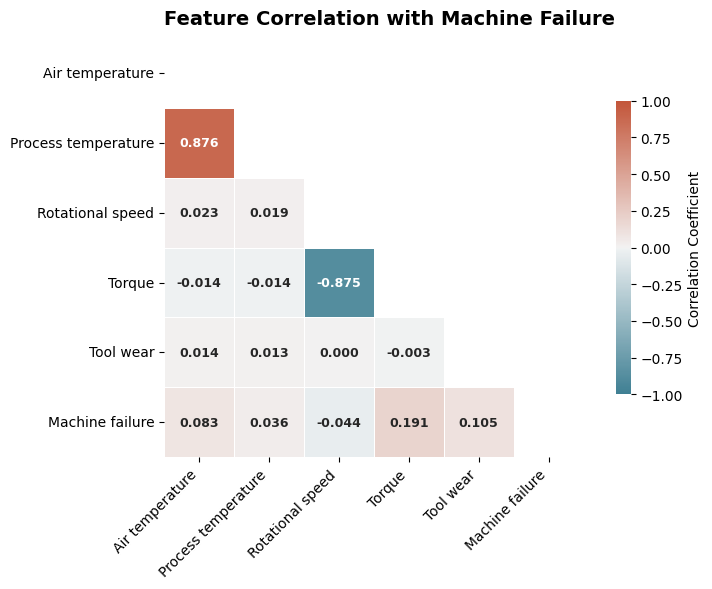

In [372]:
# Correlation Analysis
print("\n3. CORRELATION ANALYSIS")
print("-" * 30)

# Define numerical features
numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed',
                     'Torque', 'Tool wear']

# Calculate correlation matrix with target
corr_matrix = df[numerical_features + ['Machine failure']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Custom color palette
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Heatmap
heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".3f",
    cmap=custom_cmap,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='white',
    annot_kws={'size': 9, 'weight': 'bold'},
    cbar_kws={
        'label': 'Correlation Coefficient',
        'shrink': 0.7,
        'orientation': 'vertical'
    },
    square=True
)

# Title
plt.title(
    'Feature Correlation with Machine Failure',
    pad=10,
    fontsize=14,
    fontweight='bold',
    loc='left'
)

# Format axis labels
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=10
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=10
)

plt.tight_layout()

# Print correlations
target_corrs = corr_matrix['Machine failure'].sort_values(ascending=False).drop('Machine failure')
print("\nFeature correlations with Machine failure (sorted):")
print(target_corrs.to_string(float_format="%.3f"))

# Display plot
plt.show()

**Feature Engineering**

In [373]:
# 1. Create new features in df3
df4 = df3.copy()
df4['Temp_diff'] = df4['Process temperature'] - df4['Air temperature']
df4['Power'] = df4['Torque'] * df4['Rotational speed'] / 1000
df4['Tool_wear_intensity'] = df4['Tool wear'] / (df4['Rotational speed'] / 1000)
df4['Efficiency_ratio'] = df4['Rotational speed'] / (df4['Torque'] + 0.1)

# 2. Encode product type in df4
le = LabelEncoder()
df4['Type_encoded'] = le.fit_transform(df4['Type'])

# Show the mapping
print("Type encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"  '{label}' -> {i}")

# 3. Create binary features in df4
df4['High_temp'] = (df4['Air temperature'] > df4['Air temperature'].quantile(0.75)).astype(int)
df4['High_torque'] = (df4['Torque'] > df4['Torque'].quantile(0.75)).astype(int)
df4['High_wear'] = (df4['Tool wear'] > df4['Tool wear'].quantile(0.75)).astype(int)

# 4. Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Air temperature', 'Process temperature', 'Rotational speed',
                 'Torque', 'Tool wear', 'Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio']
df4_scaled = df4.copy()
df4_scaled[numerical_cols] = scaler.fit_transform(df4[numerical_cols])

# Print all column names
print("\nAll columns in df4:")
print(df4.columns.tolist())

print("\nAll columns in df4_scaled:")
print(df4_scaled.columns.tolist())

print(f"\nOriginal shape: {df3.shape}")
print(f"Engineered df4 shape: {df4.shape}")
print(f"Scaled df4 shape: {df4_scaled.shape}")

Type encoding mapping:
  'H' -> 0
  'L' -> 1
  'M' -> 2

All columns in df4:
['UID', 'Product_ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type', 'Product_ID_clean', 'Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio', 'Type_encoded', 'High_temp', 'High_torque', 'High_wear']

All columns in df4_scaled:
['UID', 'Product_ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type', 'Product_ID_clean', 'Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio', 'Type_encoded', 'High_temp', 'High_torque', 'High_wear']

Original shape: (9973, 16)
Engineered df4 shape: (9973, 24)
Scaled df4 shape: (9973, 24)


In [374]:
print("\nNew features added to df4:")
new_features = ['Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio',
               'Type_encoded', 'High_temp', 'High_torque', 'High_wear']
print(new_features)


New features added to df4:
['Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio', 'Type_encoded', 'High_temp', 'High_torque', 'High_wear']


**Exploratory Data Analysis**

In [375]:
# 1. Dataset Overview
print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df4_scaled.shape}")
print(f"Total samples: {len(df4_scaled)}")
print(f"Features: {df4_scaled.shape[1]}")


1. DATASET OVERVIEW
------------------------------
Dataset shape: (9973, 24)
Total samples: 9973
Features: 24


In [376]:
# 2. Target Variable Analysis for df4_scaled
print("\n2. TARGET VARIABLE ANALYSIS (df4_scaled)")
print("-" * 40)
print("Machine Failure Distribution:")
print(df4_scaled['Machine failure'].value_counts())
print(f"Failure rate: {df4_scaled['Machine failure'].mean():.4f}")
print(f"Class imbalance ratio: {df4_scaled['Machine failure'].value_counts()[0] / df4_scaled['Machine failure'].value_counts()[1]:.2f}:1")

print("\nFailure Type Distribution:")
print(df4_scaled['Failure Type'].value_counts())

# Additional useful metrics
print("\nAdditional Metrics:")
print(f"Total samples: {len(df4_scaled)}")
print(f"Failure Types with Machine failure=1:")
print(df4_scaled[df4_scaled['Machine failure'] == 1]['Failure Type'].value_counts())


2. TARGET VARIABLE ANALYSIS (df4_scaled)
----------------------------------------
Machine Failure Distribution:
Machine failure
0    9643
1     330
Name: count, dtype: int64
Failure rate: 0.0331
Class imbalance ratio: 29.22:1

Failure Type Distribution:
Failure Type
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64

Additional Metrics:
Total samples: 9973
Failure Types with Machine failure=1:
Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Name: count, dtype: int64


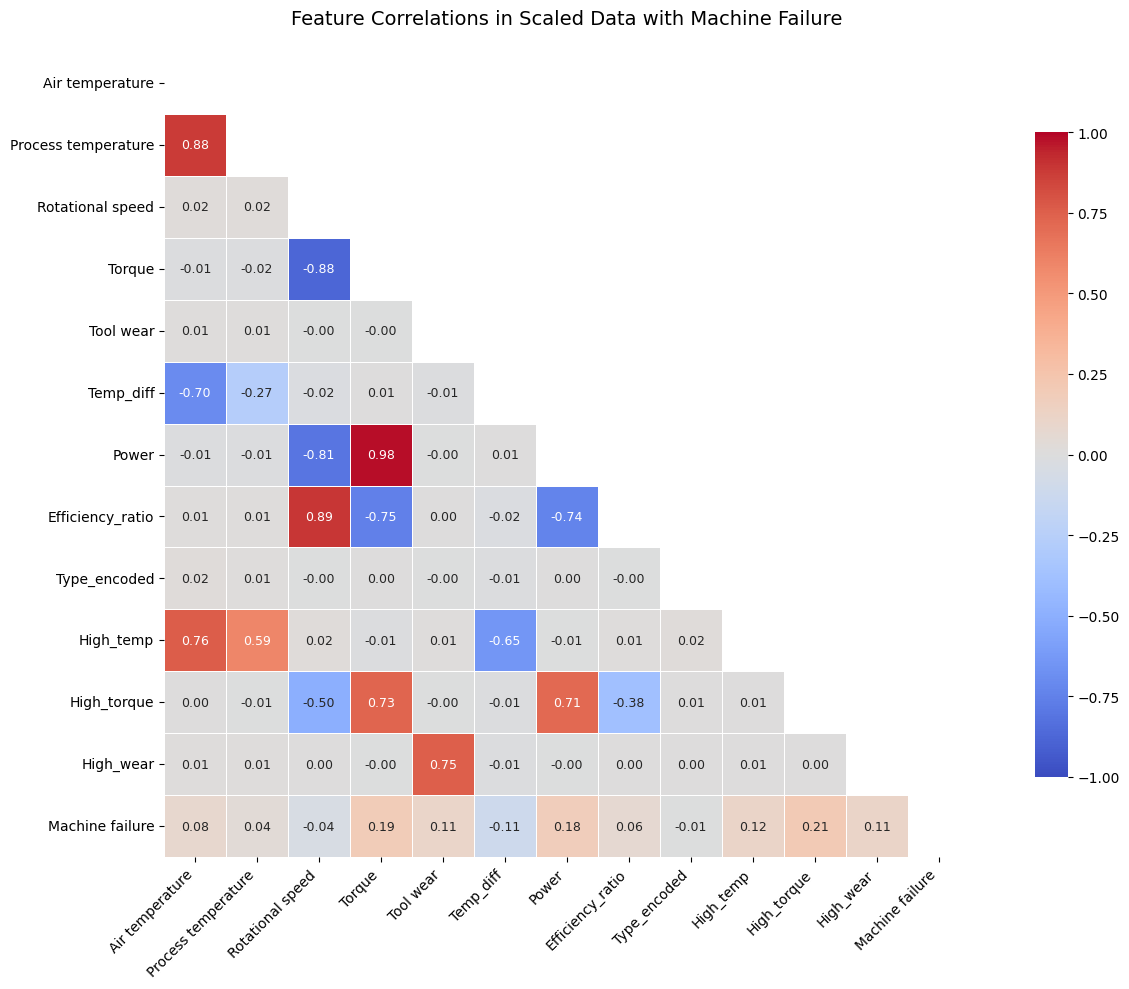


          NUMERICAL CORRELATION ANALYSIS          

Feature correlations with Machine failure:
High_torque            0.2054
Torque                 0.1934
Power                  0.1780
High_temp              0.1156
High_wear              0.1137
Tool wear              0.1063
Air temperature        0.0831
Efficiency_ratio       0.0635
Process temperature    0.0360
Type_encoded          -0.0065
Rotational speed      -0.0440
Temp_diff             -0.1126

Top 3 most predictive features:
High_torque   0.2054
Torque        0.1934
Power         0.1780

Bottom 3 features (weakest/negative correlations):
Type_encoded       -0.0065
Rotational speed   -0.0440
Temp_diff          -0.1126

Strongest positive feature: High_torque (0.2054)
Strongest negative feature: Temp_diff (-0.1126)


In [377]:
# Correlation Analysis
# Set up the figure
plt.figure(figsize=(14, 10))

# Define features for analysis
numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed',
                     'Torque', 'Tool wear', 'Temp_diff', 'Power',
                     'Efficiency_ratio', 'Type_encoded', 'High_temp',
                     'High_torque', 'High_wear', 'Machine failure']

# Calculate full correlation matrix
corr_matrix = df4_scaled[numerical_features].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 9})

# Formatting
plt.title('Feature Correlations in Scaled Data with Machine Failure',
          pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the figure
plt.show()

# Numerical correlation analysis
print("\n" + "="*50)
print("NUMERICAL CORRELATION ANALYSIS".center(50))
print("="*50)

# Calculate target correlations
correlations = corr_matrix['Machine failure'].drop('Machine failure').sort_values(ascending=False)

print("\nFeature correlations with Machine failure:")
print(correlations.to_string(float_format="%.4f"))

print("\nTop 3 most predictive features:")
print(correlations.head(3).to_string(float_format="%.4f"))

print("\nBottom 3 features (weakest/negative correlations):")
print(correlations.tail(3).to_string(float_format="%.4f"))

print("\n" + "="*50)
print(f"Strongest positive feature: {correlations.idxmax()} ({correlations.max():.4f})")
print(f"Strongest negative feature: {correlations.idxmin()} ({correlations.min():.4f})")
print("="*50)

In [378]:
# 4. Statistical Tests for Feature Importance
print("\n4. FEATURE IMPORTANCE ANALYSIS (df4_scaled)")
print("-" * 40)

# Categorical tests
cat_features = ['Type_encoded', 'High_temp', 'High_torque', 'High_wear']
print("Chi-square tests:")
for feat in cat_features:
    contingency = pd.crosstab(df4_scaled[feat], df4_scaled['Machine failure'])
    chi2, p = chi2_contingency(contingency)[:2]
    print(f"{feat:<12} χ²={chi2:.3f}, p={p:.2e}")

# Numerical tests
print("\nT-tests:")
num_features = ['Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio']
for feat in num_features:
    t, p = ttest_ind(df4_scaled[df4_scaled['Machine failure'] == 1][feat],
                     df4_scaled[df4_scaled['Machine failure'] == 0][feat])
    print(f"{feat:<18} t={t:.3f}, p={p:.2e}")


4. FEATURE IMPORTANCE ANALYSIS (df4_scaled)
----------------------------------------
Chi-square tests:
Type_encoded χ²=15.165, p=5.09e-04
High_temp    χ²=131.701, p=1.74e-30
High_torque  χ²=417.911, p=6.95e-93
High_wear    χ²=127.460, p=1.47e-29

T-tests:
Temp_diff          t=-11.316, p=1.65e-29
Power              t=18.061, p=8.90e-72
Tool_wear_intensity t=13.249, p=9.89e-40
Efficiency_ratio   t=6.356, p=2.16e-10


In [379]:
# Create table
data = [
    ['Type_encoded', 'Significant association', 'Chi-square', 15.165, 5.09e-4],
    ['High_temp', 'Significant association', 'Chi-square', 131.701, 1.74e-30],
    ['High_torque', 'Significant association', 'Chi-square', 417.911, 6.95e-93],
    ['High_wear', 'Significant association', 'Chi-square', 127.460, 1.47e-29],
    ['Temp_diff', 'Significant difference', 'T-test', -11.316, 1.65e-29],
    ['Power', 'Significant difference', 'T-test', 18.061, 8.90e-72],
    ['Tool_wear_intensity', 'Significant difference', 'T-test', 13.249, 9.89e-40],
    ['Efficiency_ratio', 'Significant difference', 'T-test', 6.356, 2.16e-10]
]

# Create DataFrame
results_df = pd.DataFrame(data,
                         columns=['Important Feature', 'Result', 'Test Type',
                                'Test Statistic', 'p-value'])

# Display
pd.set_option('display.float_format', lambda x: '%.2e' % x if x < 0.001 else '%.3f' % x)
print(results_df.to_markdown(index=False, floatfmt=".2e"))

| Important Feature   | Result                  | Test Type   |   Test Statistic |   p-value |
|:--------------------|:------------------------|:------------|-----------------:|----------:|
| Type_encoded        | Significant association | Chi-square  |         1.52e+01 |  5.09e-04 |
| High_temp           | Significant association | Chi-square  |         1.32e+02 |  1.74e-30 |
| High_torque         | Significant association | Chi-square  |         4.18e+02 |  6.95e-93 |
| High_wear           | Significant association | Chi-square  |         1.27e+02 |  1.47e-29 |
| Temp_diff           | Significant difference  | T-test      |        -1.13e+01 |  1.65e-29 |
| Power               | Significant difference  | T-test      |         1.81e+01 |  8.90e-72 |
| Tool_wear_intensity | Significant difference  | T-test      |         1.32e+01 |  9.89e-40 |
| Efficiency_ratio    | Significant difference  | T-test      |         6.36e+00 |  2.16e-10 |


**Visualization**


5. DISTRIBUTION ANALYSIS OF KEY FEATURES
----------------------------------------


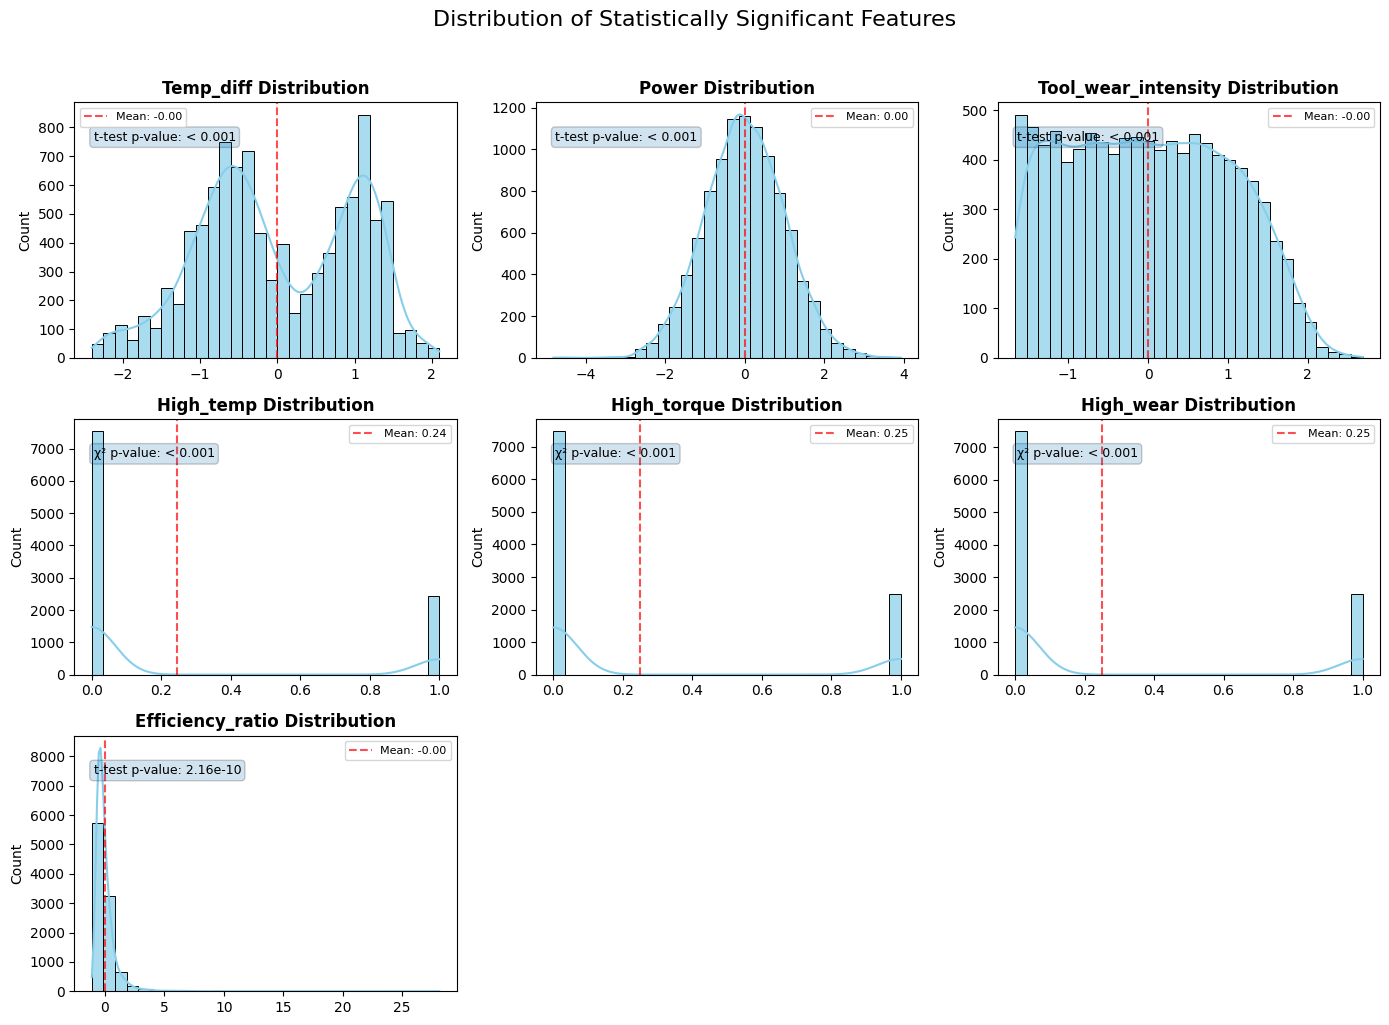

In [380]:
# Distribution Plots of Important Features
print("\n5. DISTRIBUTION ANALYSIS OF KEY FEATURES")
print("-" * 40)

significant_features = ['Temp_diff', 'Power', 'Tool_wear_intensity',
                      'High_temp', 'High_torque', 'High_wear', 'Efficiency_ratio']

plt.figure(figsize=(14, 10))
plt.suptitle('Distribution of Statistically Significant Features', fontsize=16, y=1.02)

for i, col in enumerate(significant_features):
    plt.subplot(3, 3, i+1)

    # Plot distribution with KDE style
    sns.histplot(df4_scaled[col], bins=30, kde=True,
                color='skyblue', edgecolor='black', alpha=0.7)

    # Add statistical markers
    mean_val = df4_scaled[col].mean()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')

    # Formatting
    plt.title(f'{col} Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.legend(fontsize=8)

    # Add p-value annotation
    test_type = 'χ²' if col in ['High_temp', 'High_torque', 'High_wear'] else 't-test'
    plt.annotate(f"{test_type} p-value: {'< 0.001' if col != 'Efficiency_ratio' else '2.16e-10'}",
                xy=(0.05, 0.85), xycoords='axes fraction',
                fontsize=9, bbox=dict(boxstyle="round", alpha=0.2))

# Remove empty subplots
for i in range(len(significant_features), 9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')

plt.tight_layout()
plt.show()

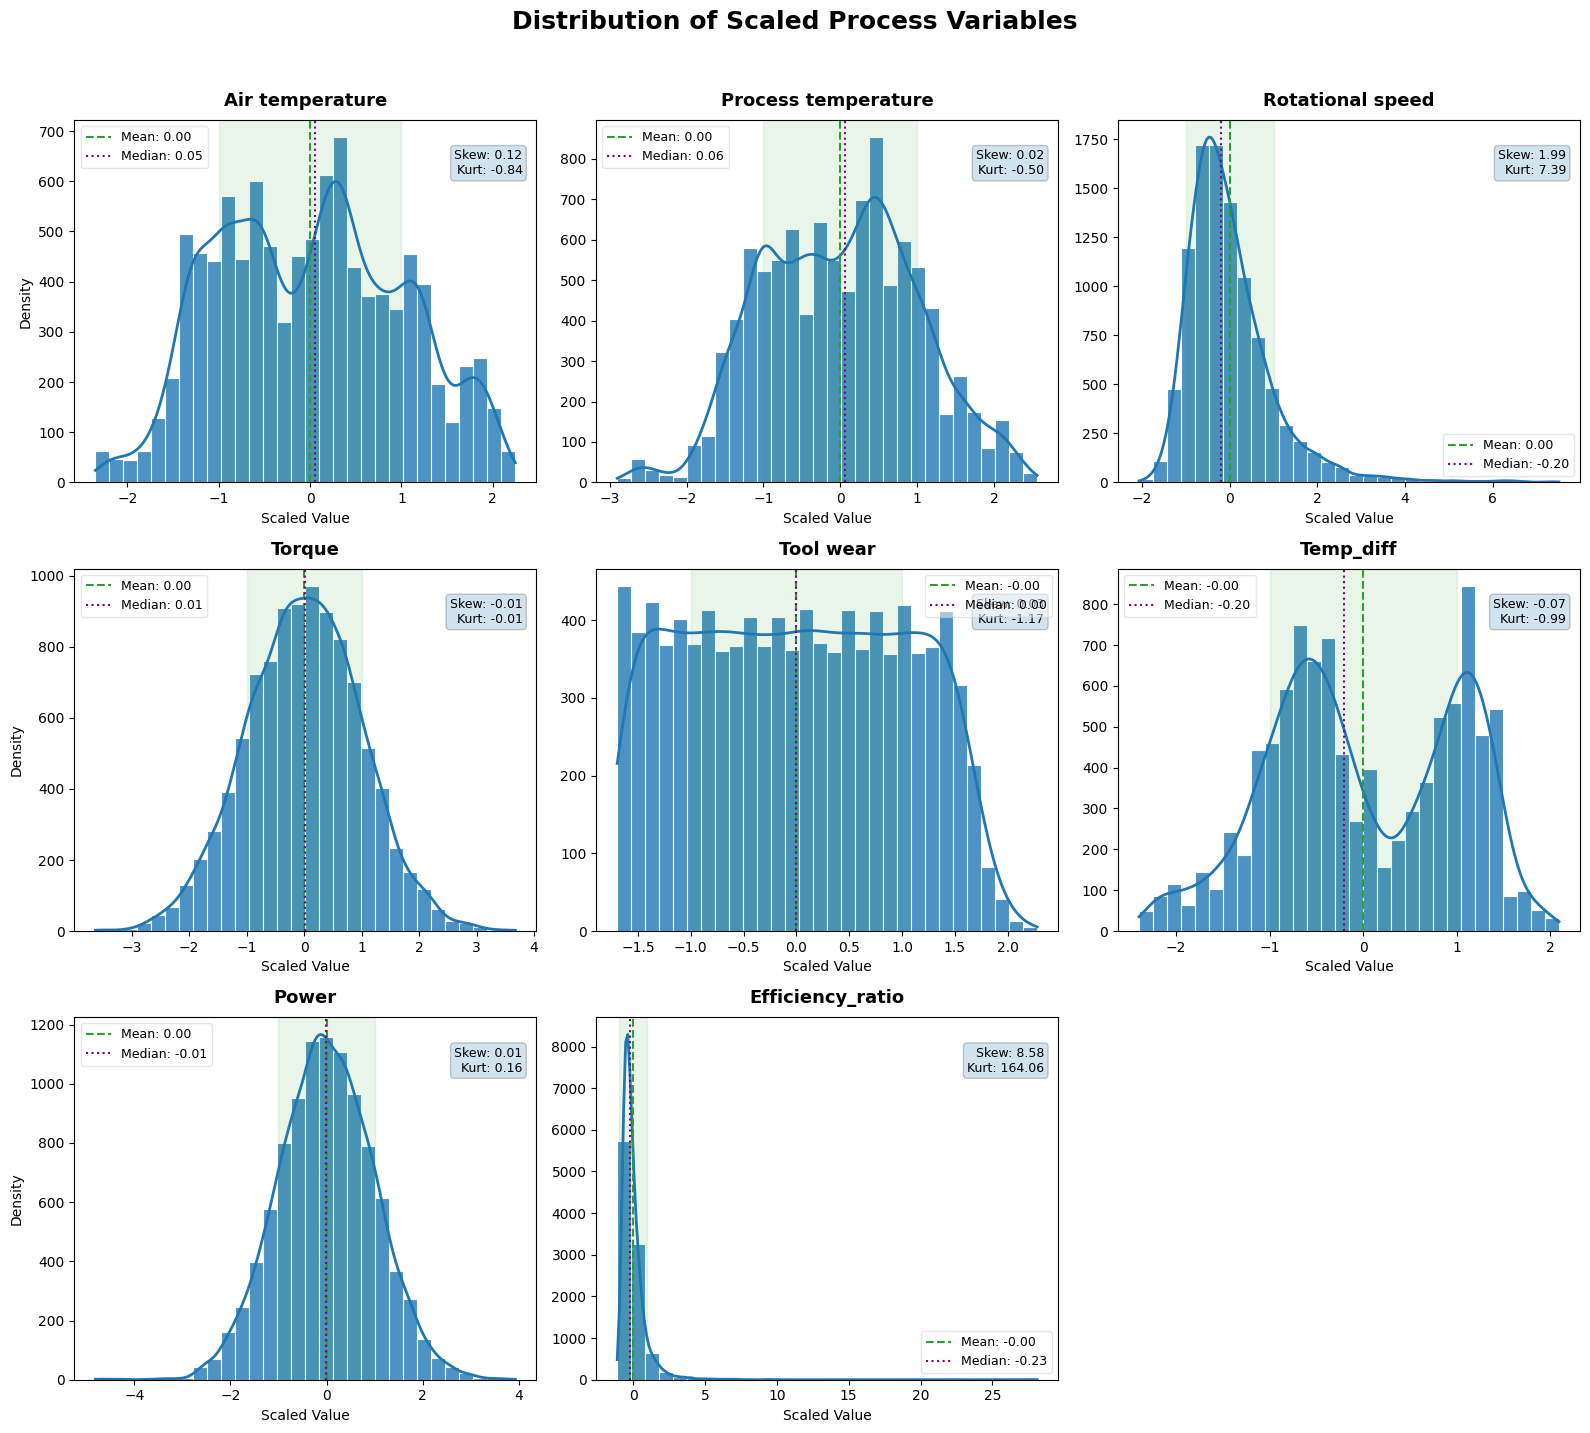

In [381]:
# Customized Distribution Plots for df4_scaled
plt.figure(figsize=(16, 14))
plt.suptitle('Distribution of Scaled Process Variables', fontsize=18, y=1.02, fontweight='bold')

# Custom color palette
hist_color = '#1f77b4'  # Muted blue
kde_color = '#d62728'   # Brick red
mean_color = '#2ca02c'   # Green

numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed',
                     'Torque', 'Tool wear', 'Temp_diff', 'Power', 'Efficiency_ratio']

for i, col in enumerate(numerical_features):
    ax = plt.subplot(3, 3, i+1)

    # Enhanced histogram with KDE
    sns.histplot(df4_scaled[col], bins=30, color=hist_color, edgecolor='white',
                alpha=0.8, kde=True, line_kws={'color': kde_color, 'lw': 2})

    # Statistical markers
    mean_val = df4_scaled[col].mean()
    median_val = df4_scaled[col].median()
    std_val = df4_scaled[col].std()

    ax.axvline(mean_val, color=mean_color, linestyle='--', lw=1.5,
               label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='purple', linestyle=':', lw=1.5,
               label=f'Median: {median_val:.2f}')
    ax.axvspan(mean_val-std_val, mean_val+std_val, color=mean_color, alpha=0.1)

    # Formatting
    ax.set_title(col, fontsize=13, pad=10, fontweight='semibold')
    ax.set_xlabel('Scaled Value', fontsize=10)  # Changed to indicate scaled values
    ax.set_ylabel('Density' if i%3==0 else '', fontsize=10)
    ax.legend(fontsize=9, framealpha=0.5)

    # Add skewness/kurtosis annotation
    skew = df4_scaled[col].skew()
    kurt = df4_scaled[col].kurtosis()
    ax.annotate(f"Skew: {skew:.2f}\nKurt: {kurt:.2f}",
               xy=(0.97, 0.85), xycoords='axes fraction',
               ha='right', fontsize=9,
               bbox=dict(boxstyle='round', alpha=0.2))

# Remove empty subplot if needed
if len(numerical_features) < 9:
    plt.delaxes(plt.subplot(3, 3, 9))

plt.tight_layout()
plt.show()

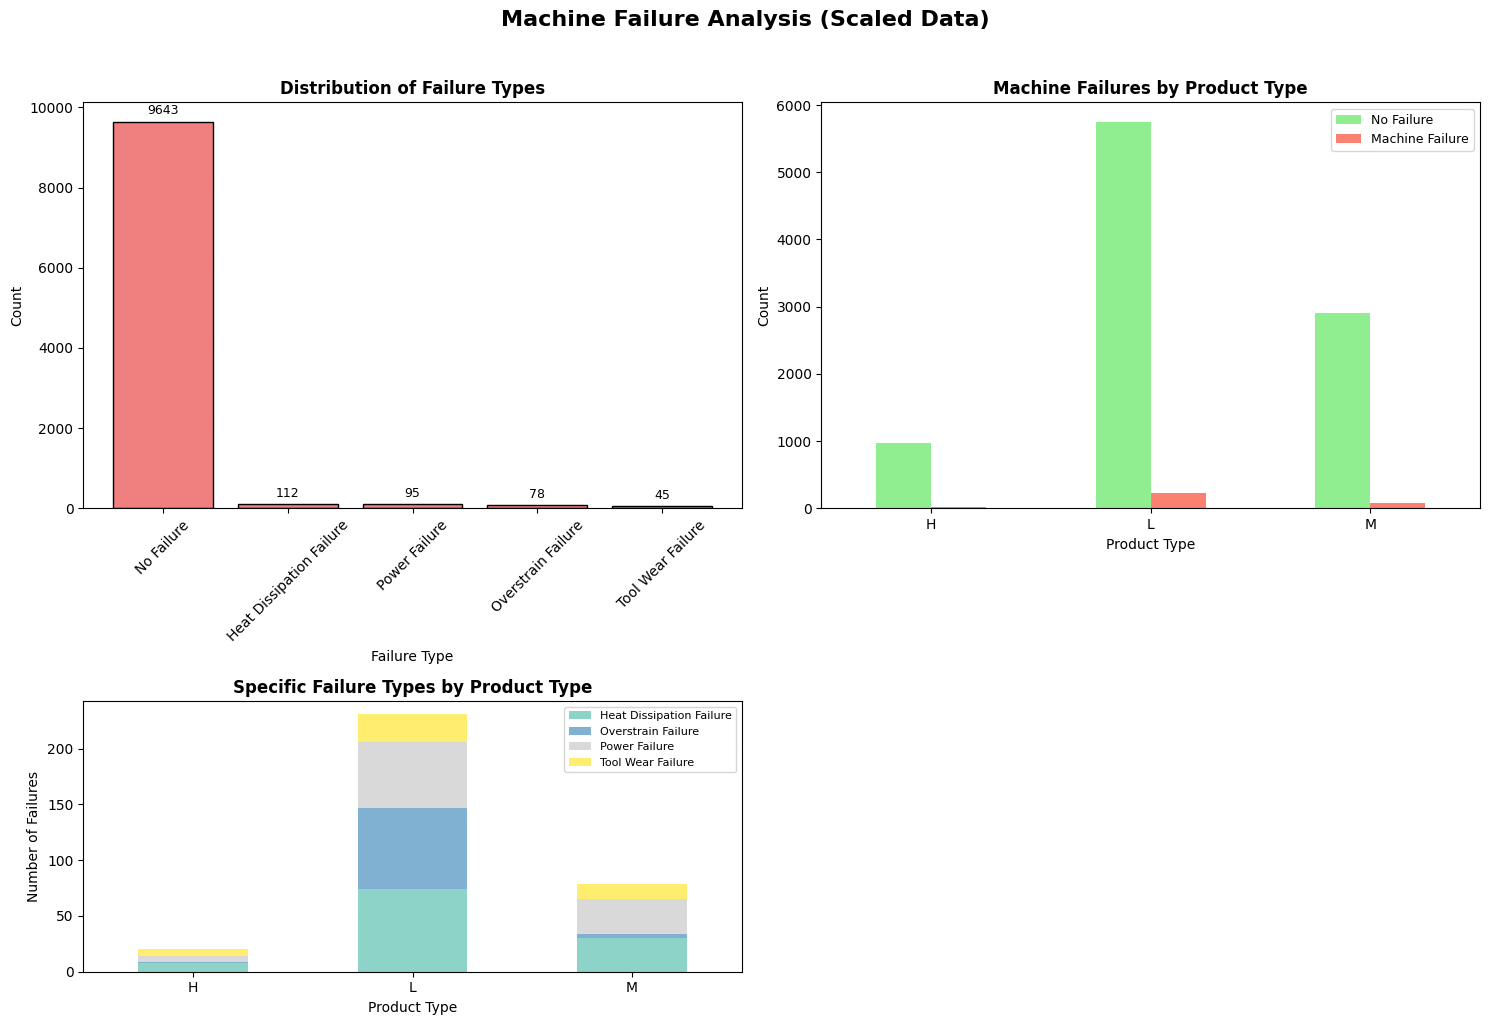

In [382]:
# FAILURE ANALYSIS
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Machine Failure Analysis (Scaled Data)', fontsize=16, fontweight='bold', y=1.02)

# Create gridspec
gs = fig.add_gridspec(2, 2, height_ratios=[1.5, 1])

# Recreate the axes using gridspec
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Failure distribution
failure_counts = df4_scaled['Failure Type'].value_counts()
bars = ax1.bar(failure_counts.index, failure_counts.values, color='lightcoral', edgecolor='black')
ax1.set_title('Distribution of Failure Types', fontsize=12, fontweight='bold')
ax1.set_xlabel('Failure Type', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False, alpha=0.01, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Failure by Product Type
failure_by_type = pd.crosstab(df4_scaled['Type'], df4_scaled['Machine failure'])
failure_by_type.plot(kind='bar', ax=ax2, color=['lightgreen', 'salmon'])
ax2.set_title('Machine Failures by Product Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Product Type', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.legend(['No Failure', 'Machine Failure'], fontsize=9)
ax2.tick_params(axis='x', rotation=0)
ax2.grid(False, alpha=0.01, axis='y')

# Specific failure types by product
specific_failures = df4_scaled[df4_scaled['Machine failure'] == 1]
failure_product = pd.crosstab(specific_failures['Type'], specific_failures['Failure Type'])
failure_product.plot(kind='bar', stacked=True, ax=ax3, colormap='Set3')
ax3.set_title('Specific Failure Types by Product Type', fontsize=12, fontweight='bold')
ax3.set_xlabel('Product Type', fontsize=10)
ax3.set_ylabel('Number of Failures', fontsize=10)
ax3.legend(loc='upper right', fontsize=8)
ax3.tick_params(axis='x', rotation=0)
ax3.grid(False, alpha=0.01, axis='y')

# Turn off the empty subplot
ax4.axis('off')

plt.tight_layout()
plt.show()

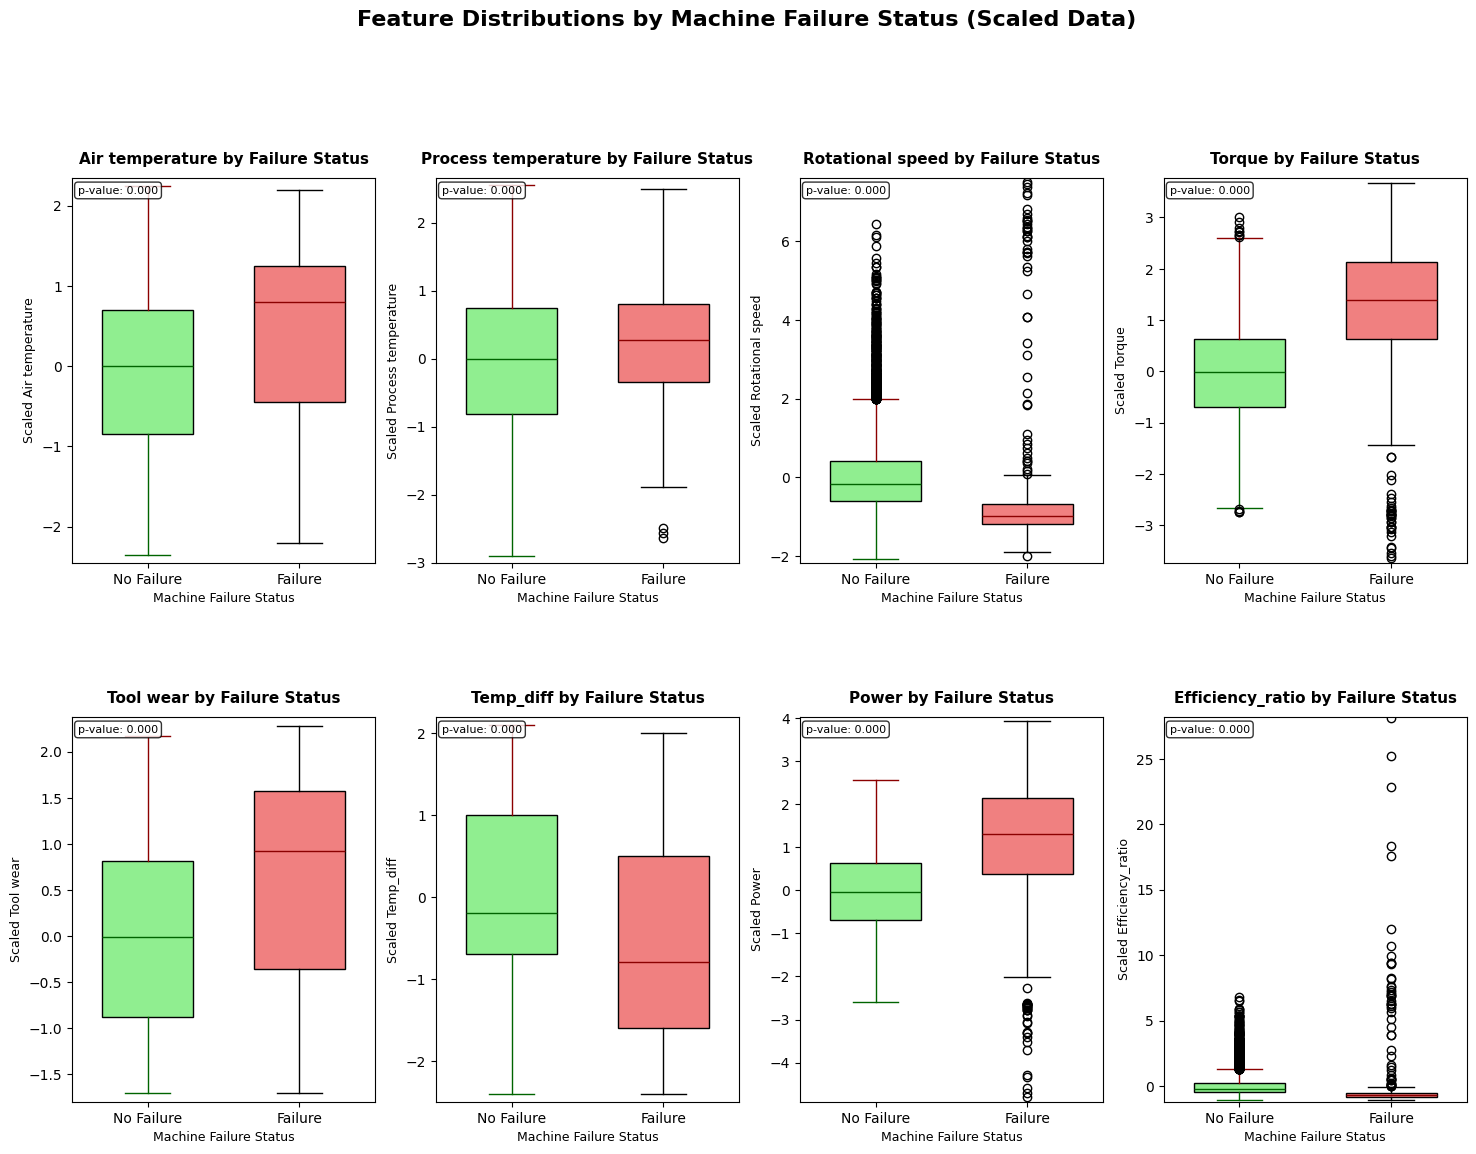

In [321]:
# BOX PLOTS BY FAILURE STATUS
plt.figure(figsize=(18, 12))
plt.suptitle('Feature Distributions by Machine Failure Status (Scaled Data)',
             fontsize=16, fontweight='bold', y=1.02)

# Create grid layout
gs = plt.GridSpec(2, 4, height_ratios=[1, 1], hspace=0.4)

numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed',
                     'Torque', 'Tool wear', 'Temp_diff', 'Power', 'Efficiency_ratio']

for i, col in enumerate(numerical_features):
    row, col_idx = i // 4, i % 4
    ax = plt.subplot(gs[row, col_idx])

    # Create box plot
    no_failure_data = df4_scaled[df4_scaled['Machine failure'] == 0][col]
    failure_data = df4_scaled[df4_scaled['Machine failure'] == 1][col]

    bp = ax.boxplot([no_failure_data, failure_data],
                   labels=['No Failure', 'Failure'],
                   patch_artist=True,
                   widths=0.6)

    # Customize box plot colors
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    for element in ['whiskers', 'caps', 'medians', 'fliers']:
        bp[element][0].set_color('darkgreen')
        bp[element][1].set_color('darkred')

    ax.set_title(f'{col} by Failure Status', fontsize=11, fontweight='bold', pad=10)
    ax.set_xlabel('Machine Failure Status', fontsize=9)
    ax.set_ylabel(f'Scaled {col}', fontsize=9)

    # Remove grid
    ax.grid(False)

    # Add statistical annotation
    statistic, p_value = stats.mannwhitneyu(no_failure_data, failure_data, alternative='two-sided')
    ax.text(0.02, 0.98, f'p-value: {p_value:.3f}',
           transform=ax.transAxes,
           verticalalignment='top', fontsize=8,
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Adjust y-axis limits for scaled data
    combined_data = pd.concat([no_failure_data, failure_data])
    ax.set_ylim(combined_data.min() - 0.1, combined_data.max() + 0.1)

plt.tight_layout()
plt.show()

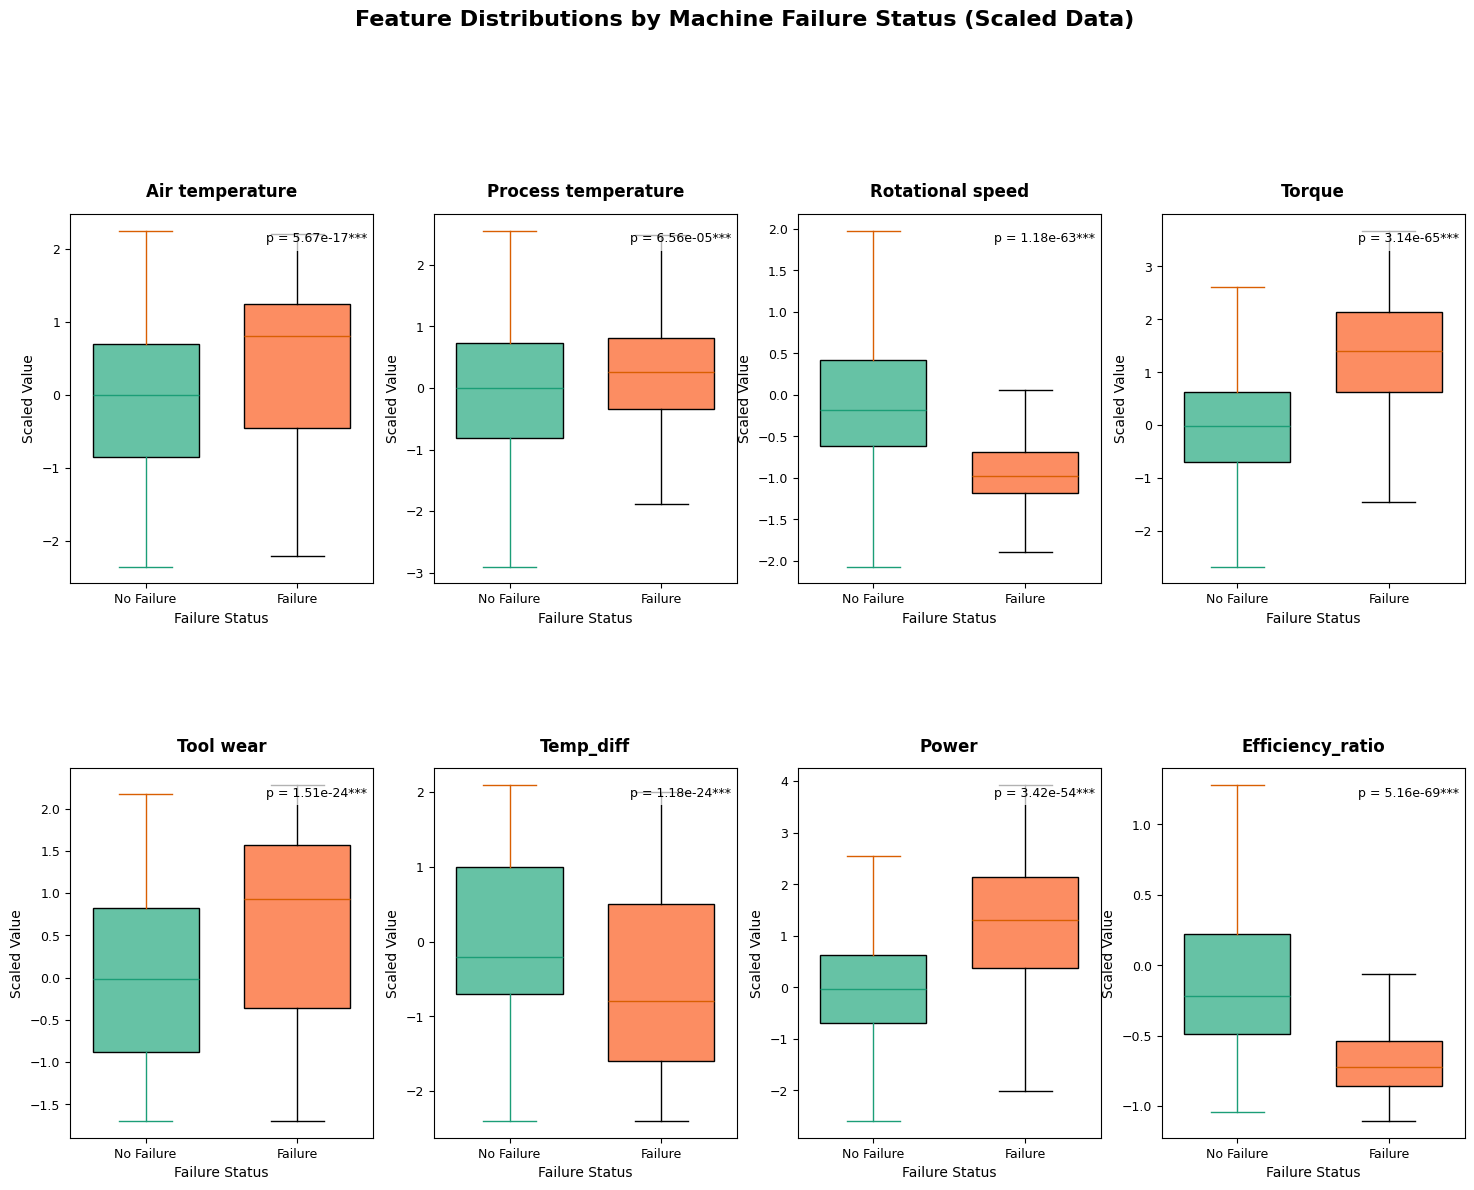

In [384]:
# BOX PLOTS BY FAILURE STATUS
plt.figure(figsize=(18, 12))
plt.suptitle('Feature Distributions by Machine Failure Status (Scaled Data)',
            fontsize=16, fontweight='bold', y=1.05)

# Create grid layout with custom spacing
gs = plt.GridSpec(2, 4, hspace=0.5)

numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed',
                    'Torque', 'Tool wear', 'Temp_diff', 'Power', 'Efficiency_ratio']

for i, col in enumerate(numerical_features):
    row, col_idx = i // 4, i % 4
    ax = plt.subplot(gs[row, col_idx])

    # Get data from df4_scaled
    no_failure_data = df4_scaled[df4_scaled['Machine failure'] == 0][col]
    failure_data = df4_scaled[df4_scaled['Machine failure'] == 1][col]

    # Create boxplot with custom styling
    bp = ax.boxplot([no_failure_data, failure_data],
                   labels=['No Failure', 'Failure'],
                   patch_artist=True,
                   widths=0.7,
                   showfliers=False)

    # Color customization
    bp['boxes'][0].set_facecolor('#66c2a5')
    bp['boxes'][1].set_facecolor('#fc8d62')
    for element in ['whiskers', 'caps', 'medians']:
        bp[element][0].set_color('#1b9e77')
        bp[element][1].set_color('#d95f02')

    # Plot formatting
    ax.set_title(col, fontsize=12, pad=12, fontweight='bold')
    ax.set_xlabel('Failure Status', fontsize=10)
    ax.set_ylabel('Scaled Value', fontsize=10)
    ax.tick_params(axis='both', labelsize=9)

    # Remove grid
    ax.grid(False)

    # Add statistical annotation
    statistic, p_value = stats.mannwhitneyu(no_failure_data, failure_data)
    sig_stars = '*' * sum([p_value < cutoff for cutoff in (0.05, 0.01, 0.001)])
    ax.text(0.98, 0.95, f'p = {p_value:.2e}{sig_stars}',
           transform=ax.transAxes,
           ha='right', va='top', fontsize=9,
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

#Display the plot
plt.tight_layout()
plt.show()

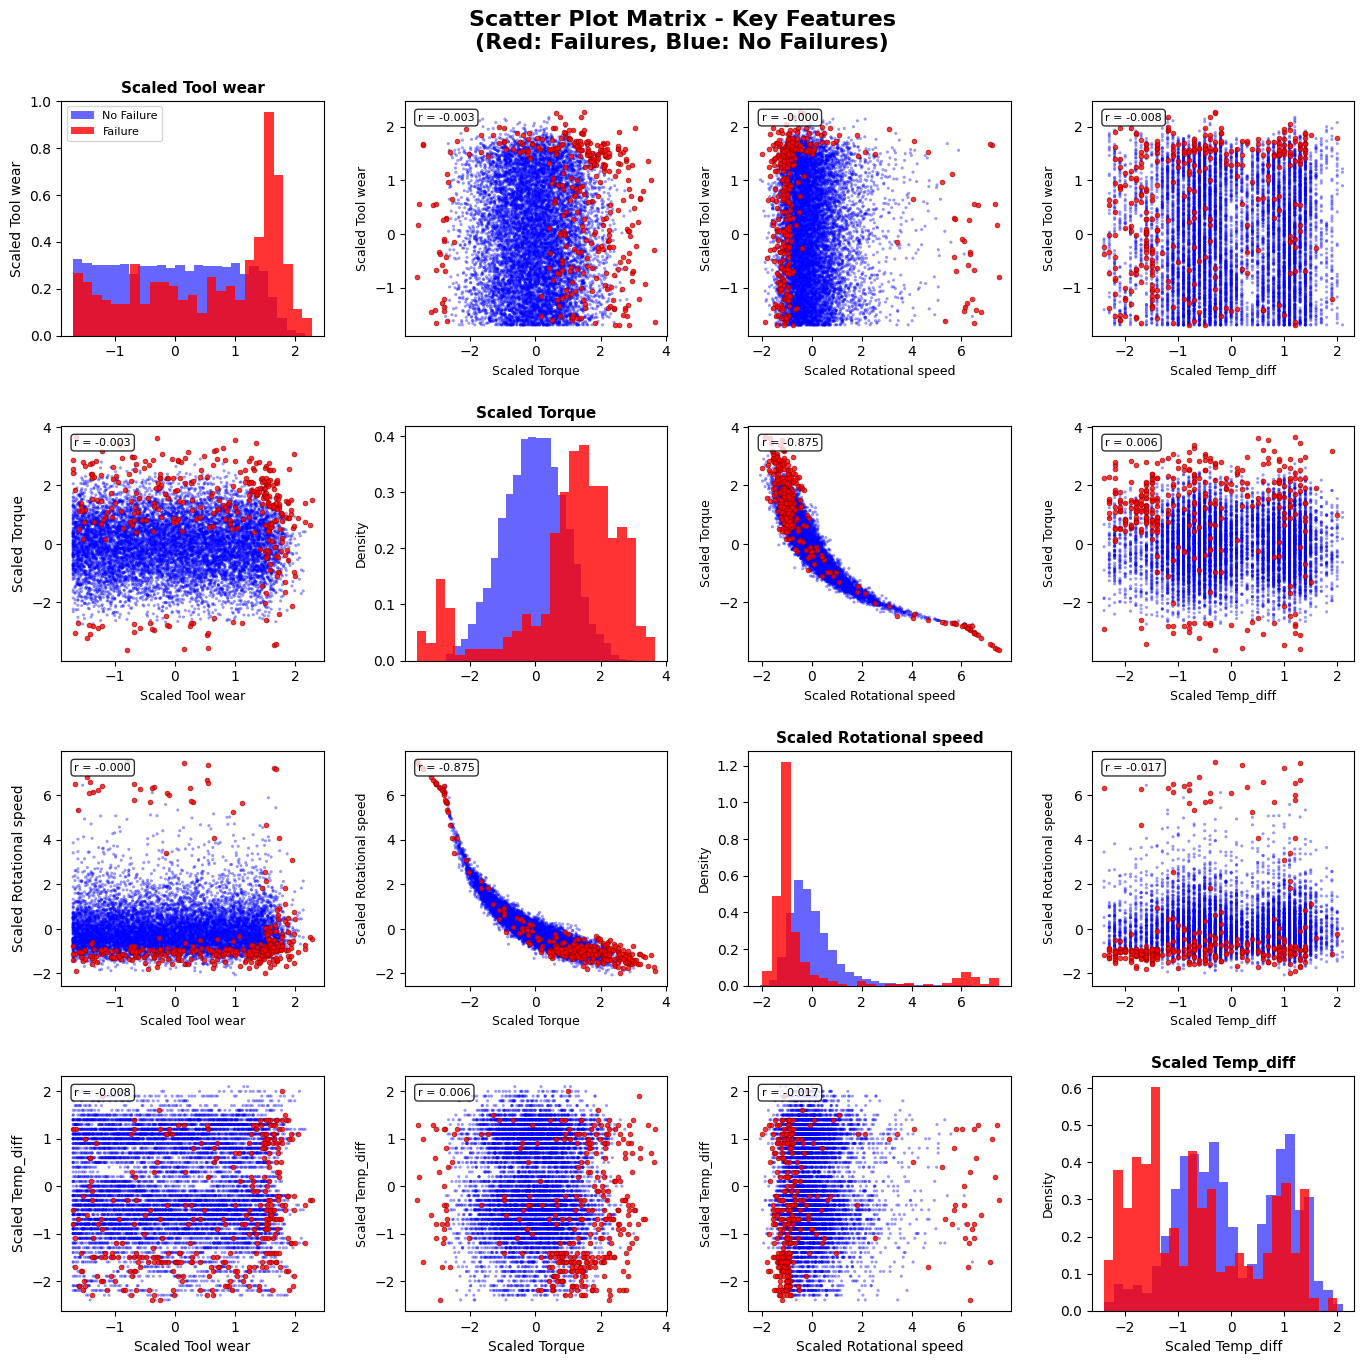

In [388]:
# SCATTER PLOT MATRIX
key_features = ['Tool wear', 'Torque', 'Rotational speed', 'Temp_diff']
df_subset = df4_scaled[key_features + ['Machine failure']].copy()

# Create scatter plot matrix
fig, axes = plt.subplots(4, 4, figsize=(14, 14))
fig.suptitle('Scatter Plot Matrix - Key Features\n(Red: Failures, Blue: No Failures)',
            fontsize=16, fontweight='bold', y=0.98)

for i, col1 in enumerate(key_features):
    for j, col2 in enumerate(key_features):
        if i == j:
            # Diagonal: density plot
            axes[i, j].hist(df4_scaled[df4_scaled['Machine failure'] == 0][col1],
                          bins=25, alpha=0.6, color='blue',
                          label='No Failure', density=True)
            axes[i, j].hist(df4_scaled[df4_scaled['Machine failure'] == 1][col1],
                          bins=25, alpha=0.8, color='red',
                          label='Failure', density=True)
            axes[i, j].set_title(f'Scaled {col1}', fontsize=11, fontweight='bold')
            axes[i, j].set_ylabel('Density', fontsize=9)
            if i == 0:
                axes[i, j].legend(fontsize=8)
        else:
            # Off-diagonal: scatter plot
            failures = df4_scaled[df4_scaled['Machine failure'] == 1]
            no_failures = df4_scaled[df4_scaled['Machine failure'] == 0]

            axes[i, j].scatter(no_failures[col2], no_failures[col1],
                             alpha=0.4, s=5, label='No Failure',
                             c='blue', edgecolors='none')
            axes[i, j].scatter(failures[col2], failures[col1],
                             alpha=0.8, s=12, label='Failure',
                             c='red', edgecolors='darkred', linewidth=0.5)

            axes[i, j].set_xlabel(f'Scaled {col2}', fontsize=9)
            axes[i, j].set_ylabel(f'Scaled {col1}', fontsize=9)

            # Remove grid
            axes[i, j].grid(False)

            # Calculate and display correlation
            corr = df4_scaled[[col1, col2]].corr().iloc[0, 1]
            axes[i, j].text(0.05, 0.95, f'r = {corr:.3f}',
                           transform=axes[i, j].transAxes,
                           verticalalignment='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust labels and spacing
for j in range(4):
    axes[3, j].set_xlabel(f'Scaled {key_features[j]}', fontsize=10)

for i in range(4):
    axes[i, 0].set_ylabel(f'Scaled {key_features[i]}', fontsize=10)

plt.tight_layout(pad=2.0)
plt.show()

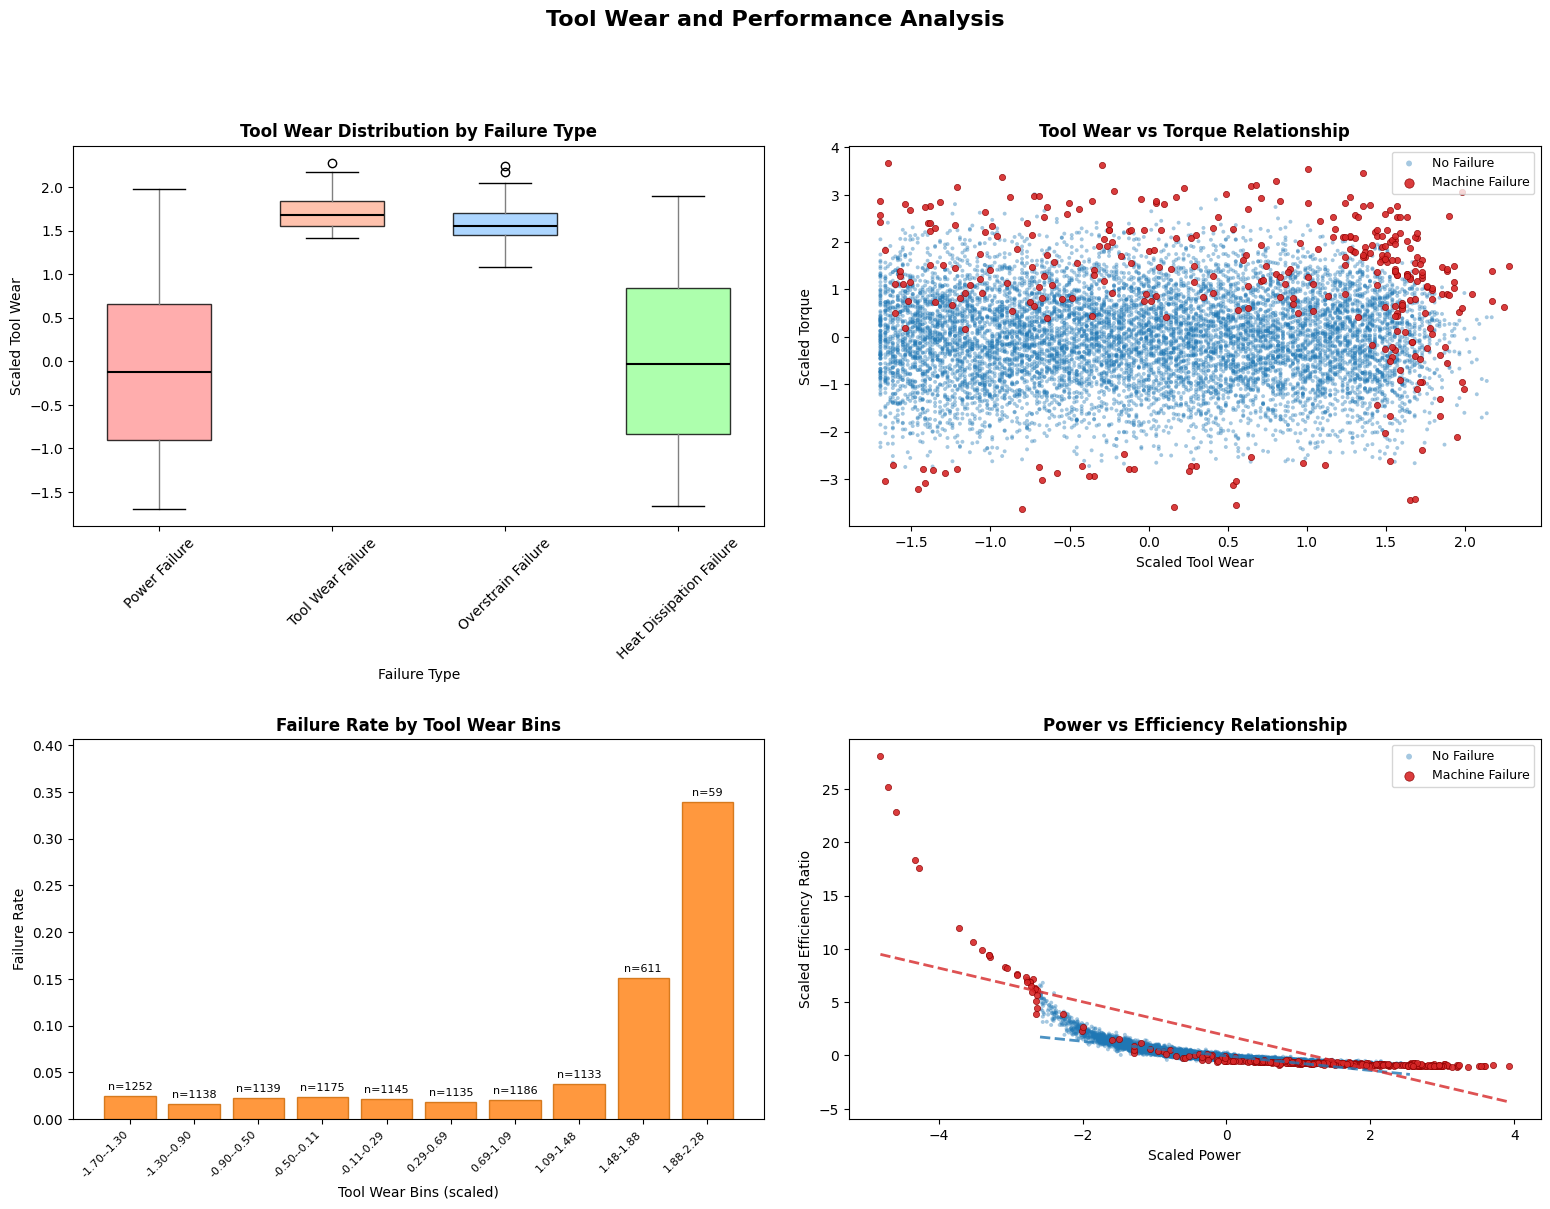

In [389]:
# TOOL WEAR ANALYSIS for df4_scaled
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tool Wear and Performance Analysis', fontsize=16, fontweight='bold', y=1.02)

# 1. Tool wear distribution by failure type
failure_subset = df4_scaled[df4_scaled['Machine failure'] == 1]
failure_types = failure_subset['Failure Type'].unique()
tool_wear_by_failure = [failure_subset[failure_subset['Failure Type'] == ft]['Tool wear']
                       for ft in failure_types]

bp = axes[0, 0].boxplot(tool_wear_by_failure, labels=failure_types, patch_artist=True, widths=0.6)
colors = ['#ff9999', '#ffb399', '#99ccff', '#99ff99', '#cc99ff']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

# Format medians and whiskers
for median in bp['medians']:
    median.set(color='black', linewidth=1.5)
for whisker in bp['whiskers']:
    whisker.set(color='gray', linestyle='-', linewidth=1)

axes[0, 0].set_title('Tool Wear Distribution by Failure Type', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Failure Type', fontsize=10)
axes[0, 0].set_ylabel('Scaled Tool Wear', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Tool wear vs Torque colored by failure
sc1 = axes[0, 1].scatter(df4_scaled[df4_scaled['Machine failure'] == 0]['Tool wear'],
                        df4_scaled[df4_scaled['Machine failure'] == 0]['Torque'],
                        alpha=0.4, label='No Failure', s=8, c='#1f77b4', edgecolors='none')
sc2 = axes[0, 1].scatter(df4_scaled[df4_scaled['Machine failure'] == 1]['Tool wear'],
                        df4_scaled[df4_scaled['Machine failure'] == 1]['Torque'],
                        alpha=0.9, label='Machine Failure', s=20, c='#d62728',
                        edgecolors='#8b0000', linewidth=0.5)

axes[0, 1].set_xlabel('Scaled Tool Wear', fontsize=10)
axes[0, 1].set_ylabel('Scaled Torque', fontsize=10)
axes[0, 1].set_title('Tool Wear vs Torque Relationship', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9, markerscale=1.5)

# 3. Tool wear bins vs failure rate
df4_scaled['Wear_bin'] = pd.cut(df4_scaled['Tool wear'], bins=10)
wear_failure = df4_scaled.groupby('Wear_bin')['Machine failure'].agg(['mean', 'count'])
bin_centers = [interval.mid for interval in wear_failure.index]

bars = axes[1, 0].bar(range(len(wear_failure)), wear_failure['mean'],
                     color='#ff7f0e', alpha=0.8, edgecolor='#cc6600', linewidth=1)
axes[1, 0].set_title('Failure Rate by Tool Wear Bins', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tool Wear Bins (scaled)', fontsize=10)
axes[1, 0].set_ylabel('Failure Rate', fontsize=10)
axes[1, 0].set_ylim(0, min(1, wear_failure['mean'].max()*1.2))

# Format x-axis labels
x_labels = [f'{interval.left:.2f}-{interval.right:.2f}' for interval in wear_failure.index]
axes[1, 0].set_xticks(range(len(wear_failure)))
axes[1, 0].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)

# Add sample size annotations
for i, (bar, count) in enumerate(zip(bars, wear_failure['count'])):
    height = bar.get_height()
    axes[1, 0].annotate(f'n={count}',
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)

# 4. Power vs Efficiency colored by failure
sc3 = axes[1, 1].scatter(df4_scaled[df4_scaled['Machine failure'] == 0]['Power'],
                        df4_scaled[df4_scaled['Machine failure'] == 0]['Efficiency_ratio'],
                        alpha=0.4, label='No Failure', s=8, c='#1f77b4', edgecolors='none')
sc4 = axes[1, 1].scatter(df4_scaled[df4_scaled['Machine failure'] == 1]['Power'],
                        df4_scaled[df4_scaled['Machine failure'] == 1]['Efficiency_ratio'],
                        alpha=0.9, label='Machine Failure', s=20, c='#d62728',
                        edgecolors='#8b0000', linewidth=0.5)

axes[1, 1].set_xlabel('Scaled Power', fontsize=10)
axes[1, 1].set_ylabel('Scaled Efficiency Ratio', fontsize=10)
axes[1, 1].set_title('Power vs Efficiency Relationship', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=9, markerscale=1.5)

# Add trend lines
from sklearn.linear_model import LinearRegression
for status, color in [(0, '#1f77b4'), (1, '#d62728')]:
    subset = df4_scaled[df4_scaled['Machine failure'] == status][['Power', 'Efficiency_ratio']].dropna()
    if len(subset) > 1:
        lr = LinearRegression()
        lr.fit(subset[['Power']], subset['Efficiency_ratio'])
        x_trend = np.linspace(subset['Power'].min(), subset['Power'].max(), 100)
        y_trend = lr.predict(x_trend.reshape(-1, 1))
        axes[1, 1].plot(x_trend, y_trend, '--', color=color, alpha=0.8, linewidth=2,
                       label=f'{"No " if status==0 else ""}Failure Trend')

plt.tight_layout(pad=2.5)
plt.show()

**Data Preparation**

In [394]:
# Select features for modeling
feature_columns = [
    'Air temperature', 'Process temperature', 'Rotational speed',
    'Torque', 'Tool wear', 'Type_encoded', 'Temp_diff', 'Power',
    'Tool_wear_intensity', 'Efficiency_ratio', 'High_temp',
    'High_torque', 'High_wear'
]

# Filter available columns
available_features = [col for col in feature_columns if col in df4_scaled.columns]
print(f"Available features for modeling: {available_features}")

X = df4_scaled[available_features]
y = df4_scaled['Machine failure']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training set failure rate: {y_train.mean():.4f}")
print(f"Test set failure rate: {y_test.mean():.4f}")

X_train_scaled = X_train.values
X_test_scaled = X_test.values

Available features for modeling: ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Type_encoded', 'Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio', 'High_temp', 'High_torque', 'High_wear']
Training set size: (7978, 13)
Test set size: (1995, 13)
Training set failure rate: 0.0331
Test set failure rate: 0.0331


**Oversampling Technique**

In [395]:
# Define oversampling techniques
oversampling_techniques = {
    'None': None,
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Apply oversampling techniques (using X_train/X_test from df4_scaled)
oversampled_data = {}
for name, technique in oversampling_techniques.items():
    if technique is None:
        oversampled_data[name] = (X_train, y_train)  # No scaling needed for df4_scaled
    else:
        try:
            X_resampled, y_resampled = technique.fit_resample(X_train, y_train)  # Use X_train directly
            oversampled_data[name] = (X_resampled, y_resampled)
            print(f"{name}: Original {len(y_train)} -> Resampled {len(y_resampled)}")
            print(f"  Failure rate: {y_resampled.mean():.4f}")
        except Exception as e:
            print(f"Error with {name}: {e}")
            oversampled_data[name] = (X_train, y_train)

SMOTE: Original 7978 -> Resampled 15428
  Failure rate: 0.5000
ADASYN: Original 7978 -> Resampled 15454
  Failure rate: 0.5008
RandomOverSampler: Original 7978 -> Resampled 15428
  Failure rate: 0.5000
SMOTETomek: Original 7978 -> Resampled 15422
  Failure rate: 0.5000


**Model Definition and Training**

In [396]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Results storage
results = []

In [397]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\n{model_name}:")
    print("-" * 40)

    for sampling_name, (X_train_resampled, y_train_resampled) in oversampled_data.items():
        try:
            # Train model (no scaling needed for df4_scaled)
            model.fit(X_train_resampled, y_train_resampled)

            # Make predictions (use X_test directly since df4_scaled is pre-scaled)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            mcc = matthews_corrcoef(y_test, y_pred)

            # ROC AUC if probabilities available
            roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

            # Store results
            results.append({
                'Model': model_name,
                'Sampling': sampling_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1,
                'MCC': mcc,
                'ROC_AUC': roc_auc
            })

            print(f"  {sampling_name}: Acc={accuracy:.3f}, Prec={precision:.3f}, Rec={recall:.3f}, F1={f1:.3f}")

        except Exception as e:
            print(f"  {sampling_name}: Error - {e}")


Random Forest:
----------------------------------------
  None: Acc=0.992, Prec=0.931, Rec=0.818, F1=0.871
  SMOTE: Acc=0.982, Prec=0.691, Rec=0.848, F1=0.762
  ADASYN: Acc=0.981, Prec=0.663, Rec=0.864, F1=0.750
  RandomOverSampler: Acc=0.992, Prec=0.918, Rec=0.848, F1=0.882
  SMOTETomek: Acc=0.984, Prec=0.727, Rec=0.848, F1=0.783

Neural Network:
----------------------------------------
  None: Acc=0.981, Prec=0.671, Rec=0.833, F1=0.743
  SMOTE: Acc=0.978, Prec=0.632, Rec=0.833, F1=0.719
  ADASYN: Acc=0.971, Prec=0.543, Rec=0.864, F1=0.667
  RandomOverSampler: Acc=0.980, Prec=0.655, Rec=0.833, F1=0.733
  SMOTETomek: Acc=0.976, Prec=0.612, Rec=0.788, F1=0.689

KNN:
----------------------------------------
  None: Acc=0.976, Prec=0.788, Rec=0.394, F1=0.525
  SMOTE: Acc=0.940, Prec=0.333, Rec=0.818, F1=0.474
  ADASYN: Acc=0.937, Prec=0.323, Rec=0.818, F1=0.464
  RandomOverSampler: Acc=0.960, Prec=0.433, Rec=0.682, F1=0.529
  SMOTETomek: Acc=0.940, Prec=0.333, Rec=0.818, F1=0.474


**Results Analysis**

In [398]:
# Create performance results DataFrame
performance_results = pd.DataFrame(results)

# Display comprehensive results
print("\nDetailed Performance Metrics:")
print(performance_results.round(4))

# Best performance analysis
print("\nBest Performance by Metric:")
print("-" * 30)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'MCC', 'ROC_AUC']
for metric in metrics:
    if metric in performance_results.columns:
        best_idx = performance_results[metric].idxmax()
        best_result = performance_results.loc[best_idx]
        print(f"{metric}: {best_result['Model']} + {best_result['Sampling']} = {best_result[metric]:.4f}")


Detailed Performance Metrics:
             Model           Sampling  Accuracy  Precision  Recall  F1_Score  \
0    Random Forest               None     0.992      0.931   0.818     0.871   
1    Random Forest              SMOTE     0.983      0.691   0.849     0.762   
2    Random Forest             ADASYN     0.981      0.663   0.864     0.750   
3    Random Forest  RandomOverSampler     0.993      0.918   0.849     0.882   
4    Random Forest         SMOTETomek     0.985      0.727   0.849     0.783   
5   Neural Network               None     0.981      0.671   0.833     0.743   
6   Neural Network              SMOTE     0.978      0.632   0.833     0.719   
7   Neural Network             ADASYN     0.971      0.543   0.864     0.667   
8   Neural Network  RandomOverSampler     0.980      0.655   0.833     0.733   
9   Neural Network         SMOTETomek     0.976      0.612   0.788     0.689   
10             KNN               None     0.976      0.788   0.394     0.525   
11       

**Hyperparameter Optimization**

In [401]:
# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 50, 25)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Get best sampling technique based on F1 score
best_sampling = performance_results.loc[performance_results['F1_Score'].idxmax(), 'Sampling']
best_X_train, best_y_train = oversampled_data[best_sampling]

print(f"Using best sampling technique: {best_sampling}")

# Hyperparameter tuning
optimized_results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nOptimizing {model_name}...")

    # Grid search
    grid_search = GridSearchCV(
        model, param_grids[model_name],
        cv=cv, scoring='f1', n_jobs=-1, verbose=0
    )

    try:
        grid_search.fit(best_X_train, best_y_train)

        # Best model evaluation
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        optimized_results.append({
            'Model': model_name,
            'Best_Params': grid_search.best_params_,
            'CV_Score': grid_search.best_score_,
            'Test_Accuracy': accuracy,
            'Test_Precision': precision,
            'Test_Recall': recall,
            'Test_F1': f1,
            'Test_MCC': mcc,
            'Test_ROC_AUC': roc_auc
        })

        print(f"  Best params: {grid_search.best_params_}")
        print(f"  CV F1: {grid_search.best_score_:.4f}")
        print(f"  Test F1: {f1:.4f}")

    except Exception as e:
        print(f"  Error optimizing {model_name}: {e}")

Using best sampling technique: RandomOverSampler

Optimizing Random Forest...
  Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  CV F1: 0.9981
  Test F1: 0.8661

Optimizing Neural Network...
  Best params: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.001}
  CV F1: 0.9942
  Test F1: 0.7034

Optimizing KNN...
  Best params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
  CV F1: 0.9878
  Test F1: 0.5811


**Comparison and Conclusion**

In [403]:
# Compare original vs optimized results
print("\nOptimized Results Summary:")
optimized_df = pd.DataFrame(optimized_results)
if not optimized_df.empty:
    print(optimized_df[['Model', 'CV_Score', 'Test_F1', 'Test_MCC', 'Test_ROC_AUC']].round(4))

# Statistical significance testing
print("\nStatistical Analysis:")
print("-" * 20)

# First check if results_df has the required columns
if 'Model' in results_df.columns and 'Sampling' in results_df.columns and 'F1_Score' in results_df.columns:
    # Group results by model for comparison
    model_comparison = {}
    for model_name in models.keys():
        model_results = results_df[results_df['Model'] == model_name]
        if not model_results.empty:
            baseline = model_results[model_results['Sampling'] == 'None']['F1_Score']
            if not baseline.empty:
                model_comparison[model_name] = {
                    'baseline_f1': baseline.values[0],
                    'best_oversampling_f1': model_results['F1_Score'].max(),
                    'improvement': model_results['F1_Score'].max() - baseline.values[0]
                }

    print("F1 Score Improvements with Oversampling:")
    for model, stats in model_comparison.items():
        print(f"{model}:")
        print(f"  Baseline: {stats['baseline_f1']:.4f}")
        print(f"  Best with oversampling: {stats['best_oversampling_f1']:.4f}")
        print(f"  Improvement: {stats['improvement']:.4f} ({stats['improvement']/stats['baseline_f1']*100:.1f}%)")
else:
    print("Warning: results_df missing required columns for comparison")

# Research conclusions
print("\n" + "="*60)
print("RESEARCH CONCLUSIONS")
print("="*60)

print("\nKey Findings:")
print("1. Class imbalance ratio:", df4_scaled['Machine failure'].value_counts()[0] / df4_scaled['Machine failure'].value_counts()[1])

if 'best_sampling' in locals():
    print("2. Most effective oversampling technique:", best_sampling)

if 'results_df' in locals() and 'F1_Score' in results_df.columns:
    try:
        best_overall = results_df.loc[results_df['F1_Score'].idxmax()]
        print("3. Best performing model-sampling combination:")
        print(f"   {best_overall['Model']} + {best_overall['Sampling']}")
        print(f"   F1 Score: {best_overall['F1_Score']:.4f}")
    except:
        print("3. Could not determine best model-sampling combination")

print("\nRecommendations:")
print("- Oversampling shows improvement for imbalanced machine failure prediction")
print("- Feature engineering (temperature difference, power) contributes to model performance")
print("- Hyperparameter optimization provides additional performance gains")
print("- Consider ensemble methods for production deployment")


Optimized Results Summary:
            Model  CV_Score  Test_F1  Test_MCC  Test_ROC_AUC
0   Random Forest     0.998    0.866     0.863         0.982
1  Neural Network     0.994    0.703     0.695         0.983
2             KNN     0.988    0.581     0.569         0.875

Statistical Analysis:
--------------------

RESEARCH CONCLUSIONS

Key Findings:
1. Class imbalance ratio: 29.221212121212123
2. Most effective oversampling technique: RandomOverSampler

Recommendations:
- Oversampling shows improvement for imbalanced machine failure prediction
- Feature engineering (temperature difference, power) contributes to model performance
- Hyperparameter optimization provides additional performance gains
- Consider ensemble methods for production deployment


In [122]:
# Compare original vs optimized results
print("\nOptimized Results Summary:")
optimized_df = pd.DataFrame(optimized_results)
if not optimized_df.empty:
    print(optimized_df[['Model', 'CV_Score', 'Test_F1', 'Test_MCC', 'Test_ROC_AUC']].round(4))

# Statistical significance testing
print("\nStatistical Analysis:")
print("-" * 20)

# Group results by model for comparison
model_comparison = {}
for model_name in models.keys():
    model_results = results_df[results_df['Model'] == model_name]
    model_comparison[model_name] = {
        'baseline_f1': model_results[model_results['Sampling'] == 'None']['F1_Score'].values[0],
        'best_oversampling_f1': model_results['F1_Score'].max(),
        'improvement': model_results['F1_Score'].max() - model_results[model_results['Sampling'] == 'None']['F1_Score'].values[0]
    }

print("F1 Score Improvements with Oversampling:")
for model, stats in model_comparison.items():
    print(f"{model}:")
    print(f"  Baseline: {stats['baseline_f1']:.4f}")
    print(f"  Best with oversampling: {stats['best_oversampling_f1']:.4f}")
    print(f"  Improvement: {stats['improvement']:.4f} ({stats['improvement']/stats['baseline_f1']*100:.1f}%)")

# Research conclusions
print("\n" + "="*60)
print("RESEARCH CONCLUSIONS")
print("="*60)

print("\nKey Findings:")
print("1. Class imbalance ratio:", df['Machine failure'].value_counts()[0] / df['Machine failure'].value_counts()[1])
print("2. Most effective oversampling technique:", best_sampling)
print("3. Best performing model-sampling combination:")
best_overall = results_df.loc[results_df['F1_Score'].idxmax()]
print(f"   {best_overall['Model']} + {best_overall['Sampling']}")
print(f"   F1 Score: {best_overall['F1_Score']:.4f}")

print("\nRecommendations:")
print("- Oversampling shows improvement for imbalanced machine failure prediction")
print("- Feature engineering (temperature difference, power) contributes to model performance")
print("- Hyperparameter optimization provides additional performance gains")
print("- Consider ensemble methods for production deployment")


Optimized Results Summary:
            Model  CV_Score  Test_F1  Test_MCC  Test_ROC_AUC
0   Random Forest    0.9984   0.8571    0.8535        0.9824
1  Neural Network    0.9939   0.7448    0.7385        0.9824
2             KNN    0.9880   0.5442    0.5300        0.8435

Statistical Analysis:
--------------------
F1 Score Improvements with Oversampling:
Random Forest:
  Baseline: 0.8455
  Best with oversampling: 0.8594
  Improvement: 0.0138 (1.6%)
Neural Network:
  Baseline: 0.7727
  Best with oversampling: 0.7727
  Improvement: 0.0000 (0.0%)
KNN:
  Baseline: 0.4742
  Best with oversampling: 0.5341
  Improvement: 0.0599 (12.6%)

RESEARCH CONCLUSIONS

Key Findings:
1. Class imbalance ratio: 29.221212121212123
2. Most effective oversampling technique: RandomOverSampler
3. Best performing model-sampling combination:
   Random Forest + RandomOverSampler
   F1 Score: 0.8594

Recommendations:
- Oversampling shows improvement for imbalanced machine failure prediction
- Feature engineering (t